<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/AVS07_OU3_Caroline_Coutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AVS 07_OU3

Caroline Coutinho

Calcular o diâmetro da coluna e a altura do recheio para o sistema de absorção da AVS06 incluindo as seguintes considerações:

- Use uma razão L_S / L_S_min igual a 1.2
- Recalcule o NETS utilizando o método McCabe-Thiele
- Escolha um recheio das tabelas fornecidas incluindo, tipo, material e tamanho.
- Considere a massa específica do óleo igual a 880 kg/m3;
- A viscosidade do óleo é 0,985 Pa·s (9,85 cP);
- Calcule o diâmetro da coluna estabelecendo um valor para f_op em relação à condição de inundação;
- Calcule o N_0G e compare com o NETS;
- Considere K_0G = 5.5e-05 kmol/(m2*s) para o sistema acetona - óleo - ar;
- Calcule o H_0G;
- Calcule a altura de recheio necessária.




**Recheio escolhido**

Tipo: Anéis de Rasching 

Material: cerâmico

Tamanho: 3/8" (10 mm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Propriedades**

In [ ]:
rho_oleo = 880 # kg/m³
mi_oleo = 9.85 # CP

**Características da operação**

In [ ]:
raz = 1.2 # L_s/L_s_min
K_OG = 5.5e-5 # kmol/m²s

Dados da AVS06 que serão necessários também na AVS atual

In [ ]:
MM_oleo = 220 # kg/kmol
G_mass = 1000 # kg/h vazão de gás a ser tratada

## Parte 1: Recalculando o NETS utilizando o método McCabe-Thiele

Nessa etapa iremos recalcular o número de estágios necessários levando em consideração que o $Ls/Ls_{min} = 1.2$. 
Além disso, devemos observar que como a vazão do solvente irá mudar e portanto a fração molar da acetona na corrente do óleo na saída do absorvedor também irá mudar. Dessa forma, será necessário recalcular esse valor.

In [ ]:
#Usando o Ls_min calculado na AVS_06
Ls_min = 44.36557231588287 # kmol/h

In [ ]:
# Calculando o Ls:
Ls = 1.2*Ls_min
Ls # kmol/h

53.23868677905944

In [ ]:
# Conversão para fração mássica:
Ls_mass = Ls*MM_oleo
Ls_mass # kg/h

11712.511091393077

Tomando como base molar de 100 mol de mistura inicial de ar e acetona, temos:

- 25% é acetona, logo temos 75 mol de ar e 25 mol de acetona;

- 10% de acetona sobra no final do processo, logo teremos o equivalente de 2.5 mol de acetona;

- Sendo que 22.5 mol de acetona foram absorvidos pelo óleo (90%);

Portanto para os 1000 kg/h de mistura(29.577048210588583 kmol/h) 25% em base molar é acetona e desse montante, 90% será transferido para o óleo.

In [ ]:
trans_oleo = 29.577048210588583*0.9*0.25
trans_oleo # kmol/h

6.654835847382431

In [ ]:
# Calculo de xaf:
xaf_novo = (trans_oleo/(Ls + trans_oleo))
xaf_novo

0.11111111111111113

Portanto, o óleo do fundo detém cerca de 11% de acetona. 

Com esse dado, podemos calcular as retas de operação e de equilíbrio necessárias para o método de McCabe-Thiele. 

Como os componentes continuam os mesmos, iremos pegar os dados de X_eq e Y_eq da AVS_06. 

In [ ]:
Y_eq = [0.03333333, 0.04571682, 0.05840072, 0.07139609, 0.08471455,
       0.0983683 , 0.11237016, 0.12673362, 0.14147287, 0.15660285,
       0.1721393 , 0.18809884, 0.20449898, 0.22135822, 0.23869611,
       0.25653333, 0.27489177, 0.29379462, 0.31326644, 0.33333333]

X_eq = [0.01727116, 0.02355147, 0.02990981, 0.03634764, 0.04286646,
       0.04946781, 0.05615327, 0.06292444, 0.069783  , 0.07673065,
       0.08376913, 0.09090023, 0.0981258 , 0.10544772, 0.11286794,
       0.12038845, 0.12801129, 0.13573857, 0.14357245, 0.15151515]

In [ ]:
# Calculando Xat e Xaf a partir do novo xaf:

Xat = 0/(1+0)
Xaf = xaf_novo/(1-xaf_novo)

In [ ]:
X_lin = np.array((Xat,Xaf))
Y_lin = np.array((Y_eq[0],Y_eq[-1]))

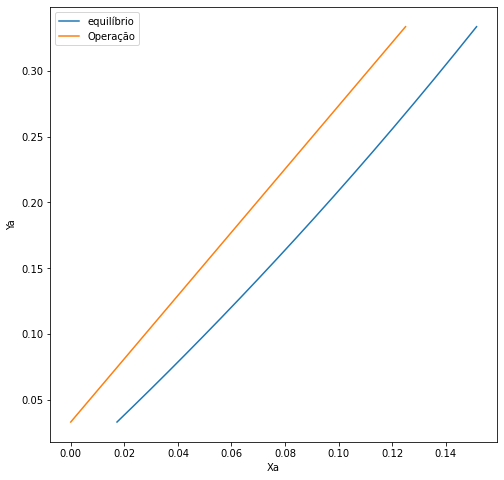

In [ ]:
fig2, ax2 = plt.subplots(figsize =(8,8))
ax2.plot(X_eq,Y_eq,label='equilíbrio')
ax2.plot(X_lin,Y_lin,label='Operação')
#Adicionando texto nos eixos - descrição
ax2.set_xlabel('Xa')
ax2.set_ylabel('Ya')
#ax2.grid()
ax2.legend()

Com esse gráfico podemos marcar o número de estágios:

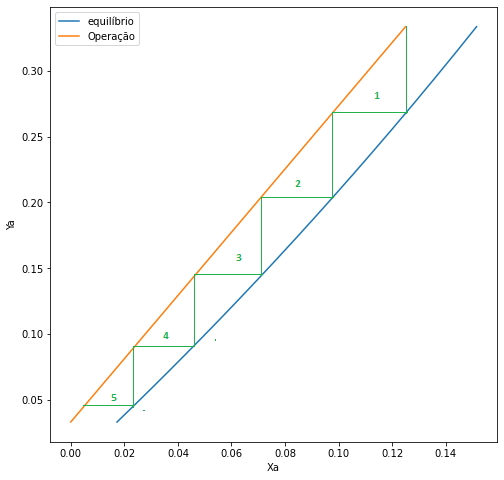

Podemos oservar pelo grafico que temos 5 estágios de absorção.

## Parte 2: Cálculo do diâmetro da coluna.

Nessa etapa iremos fazer o cálculo do diâmetro da coluna levando em consideração um valor de f_op definido como 0.7. 

Para isso, iremos seguir os seguintes passos:

- Utilizar o gráfico de correlação generalizada de perda de carga. Como temos os dados fluidinâmios dos componentes, conseguimos calcular a abscissa do gráfico e rebatendo na linha de inundação, conseguimos encontrar o Y de inundação equivalente. 

- Usar: $ \phi_G^{inu} = \sqrt(\frac{Y_{cgpc}^{inu} \cdot \rho_G \cdot \rho_L \cdot C}{cf \cdot \psi \cdot \mu^{0.2}})$ (1)

- Usar: $Dc = \sqrt(\frac{4 \cdot m_G}{\epsilon \cdot \pi \cdot \phi_G })  $ (2)

In [ ]:
# Definindi f_op:
f_op = 0.7

Temos o seginte gráfico de correlação generalizada de perda de carga:

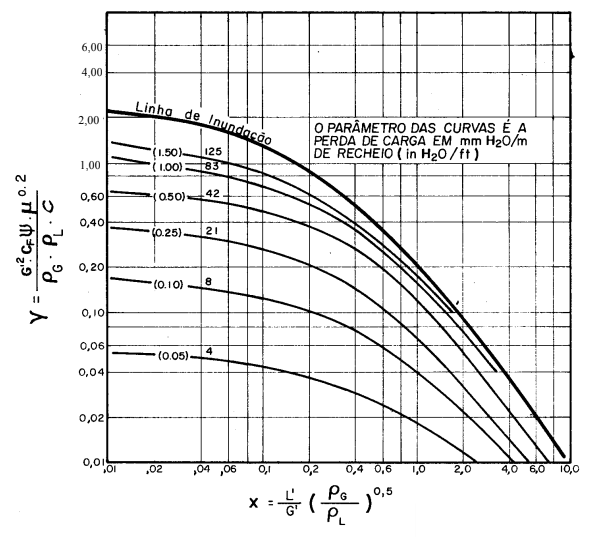

In [ ]:
# Considerando o rho apenas do ar na corrente de gás:
rho_ar = 1.2754 #kg.m-3

In [ ]:
# Calculando a abscissa:
x = (Ls_mass/G_mass)*((rho_ar/rho_oleo)**0.5)
x

0.445894263799502

Rebatendo o valor de x na curva de inundação, encontramos o valor de Y de inundação.

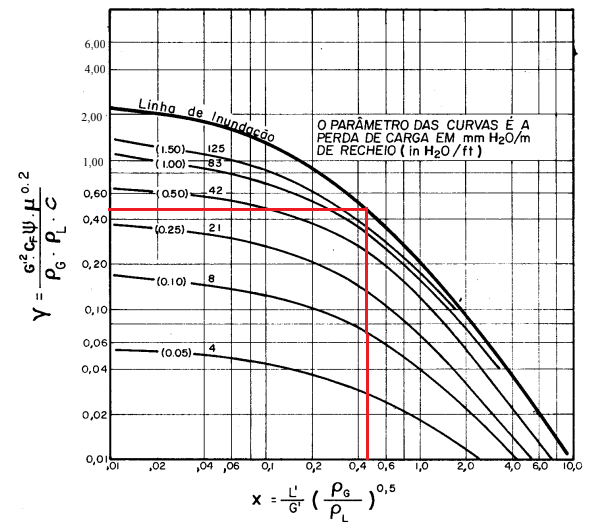

In [ ]:
Y_inu= 0.45

 Agora iremos calcular o fluxo de inundação através da equação (1).

Onde: 

C = 2.994

$\psi = \rho_{H_2O}/ \rho_L$

$μ_L$ = cP (centipoise)

$c_f$ é o fator de empacotamento do recheio

$rho = [kg/m³]$

In [ ]:
C = 2.994
psi = 998/rho_oleo
Cf = 1000 # retirado da tabela de recheio.
# mi foi inserido no começo da AVS

In [ ]:
# Calculando o fluxo de inundação:
phi_INU = (Y_inu*rho_ar*rho_oleo*C/(Cf*psi*(mi_oleo**2)))**(0.5)
phi_INU # kg/m²s

0.11722939730795835

Calculando o fluxo de gás através da seguinte equação: 

$\Phi_G = f_{op} \cdot \Phi_G^{inu} $

In [ ]:
phi_G = f_op*phi_INU
phi_G # kg/m²s

0.08206057811557084

Calculando o diâmetro da coluna através da equação (2):

Sendo que a fração de vazio $\epsilon $ foi retirada da tabela de recheio e equivale à 0.59.

In [ ]:
e = 0.59

In [ ]:
G_mass_segundo = G_mass/3600 # passando de kg/h para kg/s devido a unidade do Phi

In [ ]:
Dc = (4*G_mass_segundo/(e*3.1415*phi_G))**(0.5)
Dc #m

2.7028187391794063

Logo, o diâmetro da coluna equivale à cerca de 2.7 metros. 

#Parte 3: Cálculo da altura da coluna.

Nessa etapa seguiremos o método de cálculo disponível no texto 07 de OU3.

O primeiro passo é calcular a média logarítimica das frações molares de y em relação à acetona, dada pela equação à seguir: 

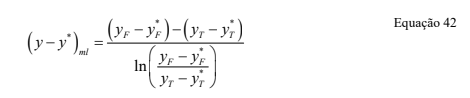

In [ ]:
yaf = 0.25           # Inicialmente a acetona corresponde a 25% da mistura ar + acetona
yat = 2.5/(75 + 2.5) 

In [ ]:
xat = 0
yat_ast = 1.9*xat
yaf_ast = 1.9*xaf_novo

In [ ]:
yltd = ((yaf - yaf_ast) - (yat - yat_ast))/(np.log((yaf - yaf_ast)/(yat - yat_ast)))
yltd

0.03547023934757251

Sendo $y*$ dado na equação de equilíbrio.

Agora podemos fazer o cálculo do número de unidades de transferência, necessárias a separação desejada, medido
pela fase gasosa ($N_{0G}$) representado pela equação 43. 

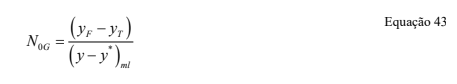

In [ ]:
N_OG = (yaf - yat)/yltd
N_OG

6.138721911352781

Temos então cerca de 6 unidades de transferência. 

**Comparação entre o $N_{0G}$ com o NETS:**

Observe que o número de estágios de estágios(NETS) em teoria deve se igualar ao número de unidades de transferência ($N_{0G})$ já que ambos tratam do número de estágios onde ocorre a absorção. 

Nese casdo o NETS encontrado foi cerca de 5 estágios, enquanto o número de unidades de transferência foi 6. Essa divergência pode ser associada à erros de aproximação nos cálculos.  

O próximo passo é o cálculo da altura da unidade de transferência, tendo como referência a fase gasosa.


Primeiro precisamos calcular $(1-y)_{ml}$ dado pela equação 18. 

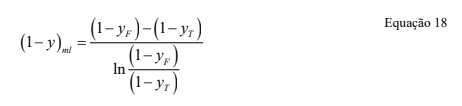

In [ ]:
dif = ((1 - yaf)-(1 - yat))/(np.log((1 - yaf)/(1 - yat)))
dif

0.8542509072008955

Calculando $H_{0G}$ através da equação 21:

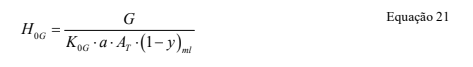

In [ ]:
At = (np.pi*Dc**2)/4
At # m²

5.737513547286865

In [ ]:
# Inserindo a área de interface específica do recheio (a) retirada da tabela de recheio:
a = 440 # m²/m³

In [ ]:
G_mol = 29.577048210588583/3600 # kmol/s
G_mol

0.008215846725163496

In [ ]:
H_OG = G_mol/(K_OG*a*At*dif)
H_OG

0.06926722510080464

Por fim calculamos a altura de recheio necessária através da equação 20:

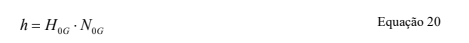

In [ ]:
h = H_OG*N_OG
h # m

0.4252122324649148

Portanto, utilizando como recheio anéis de Rasching de cerâmica 3/8" será necessário cerca de 0.43 m de altura de recheio.